In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
import yfinance as yf

start = '2023-1-1'
end = '2024-05-03'

# Fetch Apple's stock data from Yahoo Finance
df = yf.download('ICICIBANK.NS', start=start, end=end)

# Print the first few rows of the dataframe
#print(aapl_data.head())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,894.000000,907.000000,894.000000,902.450012,887.742859,4315403
2023-01-03,898.500000,905.950012,896.750000,901.349976,886.660767,5846855
2023-01-04,899.000000,907.900024,894.799988,899.099976,884.447510,12454582
2023-01-05,900.900024,903.000000,872.000000,879.150024,864.822632,16547196
2023-01-06,878.950012,878.950012,860.500000,870.099976,855.920105,14804613


In [3]:
 df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-25,1090.000000,1125.650024,1089.949951,1113.750000,1113.750000,19905338
2024-04-26,1112.150024,1120.000000,1102.750000,1107.900024,1107.900024,14190059
2024-04-29,1108.000000,1163.449951,1107.900024,1160.150024,1160.150024,28578063
2024-04-30,1159.949951,1169.550049,1146.750000,1150.400024,1150.400024,29568491
2024-05-02,1143.000000,1155.500000,1133.250000,1139.449951,1139.449951,25118334


In [4]:
df = df.reset_index()
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,894.000000,907.000000,894.000000,902.450012,887.742859,4315403
1,2023-01-03,898.500000,905.950012,896.750000,901.349976,886.660767,5846855
2,2023-01-04,899.000000,907.900024,894.799988,899.099976,884.447510,12454582
3,2023-01-05,900.900024,903.000000,872.000000,879.150024,864.822632,16547196
4,2023-01-06,878.950012,878.950012,860.500000,870.099976,855.920105,14804613


In [5]:
# Drop unnecessary columns
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,894.000000,907.000000,894.000000,902.450012,4315403
1,898.500000,905.950012,896.750000,901.349976,5846855
2,899.000000,907.900024,894.799988,899.099976,12454582
3,900.900024,903.000000,872.000000,879.150024,16547196
4,878.950012,878.950012,860.500000,870.099976,14804613


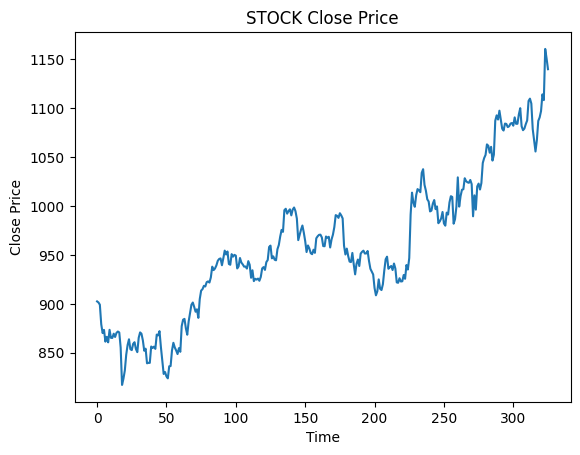

In [6]:
# Plot the 'Close' prices
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('STOCK Close Price')
plt.show()

In [7]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [8]:
ma100 = df['Close'].rolling(100).mean()


In [9]:
ma100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
321    1036.092499
322    1037.916500
323    1040.122000
324    1042.276500
325    1044.204000
Name: Close, Length: 326, dtype: float64

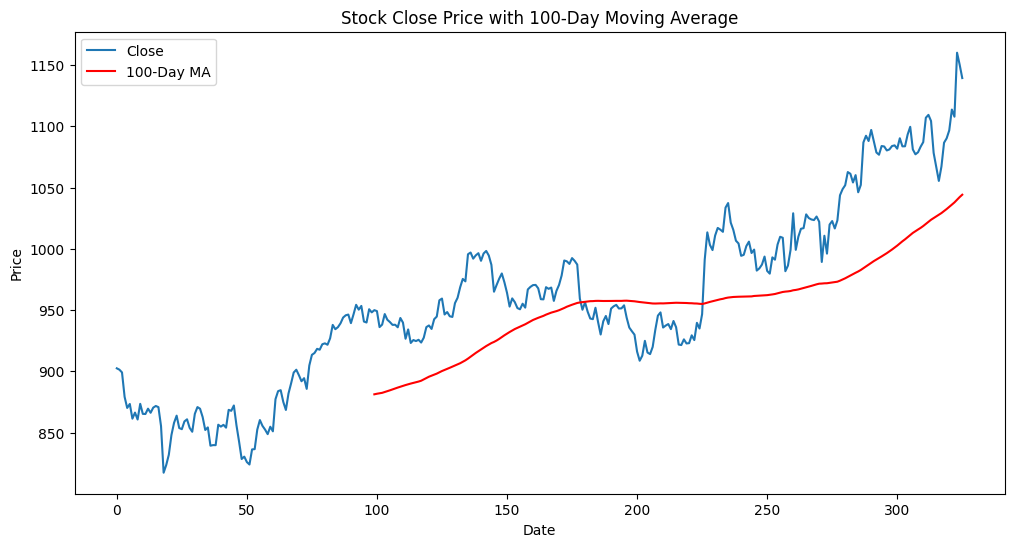

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price with 100-Day Moving Average')
plt.legend(['Close', '100-Day MA'])
plt.show()


In [11]:
ma200 = df['Close'].rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
321    995.837500
322    996.664250
323    997.741501
324    998.703501
325    999.603750
Name: Close, Length: 326, dtype: float64

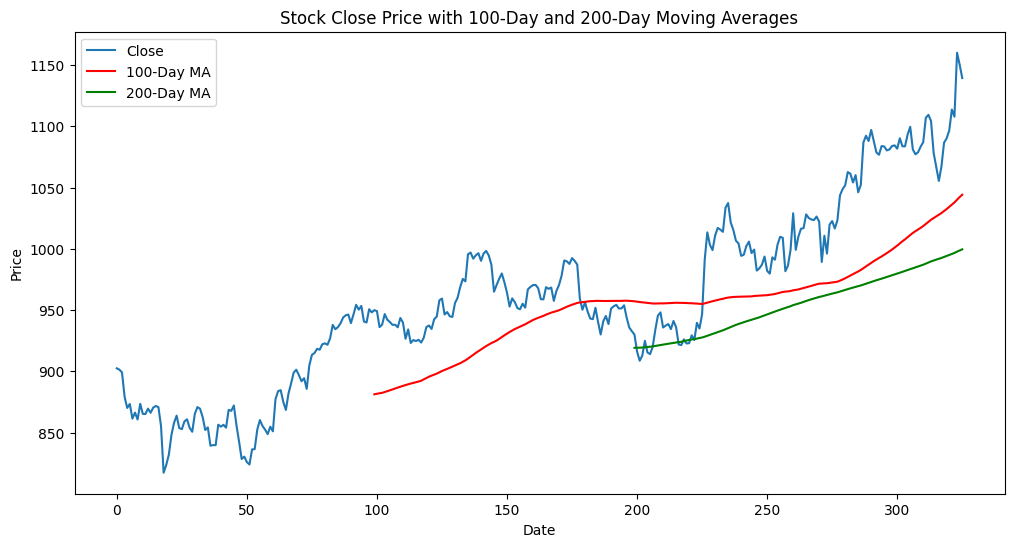

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price with 100-Day and 200-Day Moving Averages')
plt.legend(['Close', '100-Day MA', '200-Day MA'])
plt.show()


In [13]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(228, 1)
(98, 1)


In [14]:
data_training.head()

,Close
0,902.450012
1,901.349976
2,899.099976
3,879.150024
4,870.099976


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler(feature_range=(0,1))

# Fit the scaler to the training data and transform it
scaled_training_data = scaler.fit_transform(data_training)

# Transform the testing data
scaled_testing_data = scaler.transform(data_testing)


In [16]:
scaled_training_data.shape

(228, 1)

In [17]:
x_train = []
y_train = []

for i in range(100,scaled_training_data.shape[0]):
    x_train.append(scaled_training_data[i-100: i])
    y_train.append(scaled_training_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [18]:
x_train.shape

(128, 100, 1)

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu',))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - loss: 0.4549
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - loss: 0.2362
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 0.1011
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - loss: 0.0620
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - loss: 0.1034
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 0.0710
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0376
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0541
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.0379
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - loss: 0.0400
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0321
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.0306
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0302
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.0213
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.0216
Epoch 16/30
4/4 ━━

In [23]:
#For saving Model
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
228,1003.250000
229,999.000000
230,1010.849976
231,1017.099976
232,1015.700012


In [25]:
data_training.tail(100)

,Close
128,944.950012
129,944.400024
130,955.700012
131,960.049988
132,968.700012
...,...
223,939.599976
224,934.950012
225,946.700012
226,991.200012


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [28]:
final_df.head()

,Close
0,944.950012
1,944.400024
2,955.700012
3,960.049988
4,968.700012


In [29]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.14433395],
       [0.14214712],
       [0.18707749],
       [0.20437361],
       [0.23876735],
       [0.26560631],
       [0.25765403],
       [0.34572545],
       [0.35129215],
       [0.33141143],
       [0.34214707],
       [0.34910532],
       [0.32445318],
       [0.34811128],
       [0.35646109],
       [0.34155055],
       [0.31133196],
       [0.22405557],
       [0.24592436],
       [0.26640159],
       [0.2833002 ],
       [0.25467192],
       [0.22047694],
       [0.17574533],
       [0.20238554],
       [0.19025835],
       [0.17097416],
       [0.16699801],
       [0.18508941],
       [0.17236571],
       [0.23141134],
       [0.23976138],
       [0.24552684],
       [0.24612311],
       [0.23498996],
       [0.19980119],
       [0.19920467],
       [0.23876735],
       [0.23339941],
       [0.23757455],
       [0.1942345 ],
       [0.22664016],
       [0.24612311],
       [0.27673947],
       [0.32544722],
       [0.32266387],
       [0.31431407],
       [0.333

In [30]:
input_data.shape

(198, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(98, 100, 1)
(98,)


In [33]:
# Making Predictions

y_predicted = model.predict(x_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step


In [34]:
y_predicted.shape

(98, 1)

In [35]:
y_test

array([0.37614304, 0.35924444, 0.40636163, 0.43121253, 0.42564607,
       0.41848907, 0.49701789, 0.51192843, 0.4485089 , 0.42465204,
       0.38966203, 0.38071571, 0.34055651, 0.34373738, 0.3721669 ,
       0.38667992, 0.3497016 , 0.36083499, 0.29264404, 0.29980105,
       0.31212724, 0.33817093, 0.29165   , 0.28270368, 0.33558634,
       0.32803181, 0.37713708, 0.40238549, 0.39920463, 0.29065597,
       0.30894613, 0.36003971, 0.47872773, 0.36003971, 0.40278325,
       0.42842942, 0.4304175 , 0.47514911, 0.46322068, 0.45864801,
       0.45665994, 0.46819085, 0.45129225, 0.3206758 , 0.40576536,
       0.34771352, 0.44194816, 0.45347908, 0.42942346, 0.45566591,
       0.53717684, 0.55705756, 0.56978102, 0.61252456, 0.60695835,
       0.57872734, 0.6025842 , 0.5469182 , 0.57077506, 0.70874751,
       0.7304173 , 0.71332018, 0.74930398, 0.71292217, 0.67614285,
       0.66878708, 0.6970176 , 0.69562605, 0.68270358, 0.68608321,
       0.6970176 , 0.69920467, 0.68846928, 0.7222665 , 0.69602

In [36]:
y_predicted

array([[0.45832703],
       [0.45918489],
       [0.46068507],
       [0.46286663],
       [0.46574247],
       [0.46928495],
       [0.47342744],
       [0.47812533],
       [0.48333716],
       [0.48896885],
       [0.49489045],
       [0.5009439 ],
       [0.5069717 ],
       [0.5128135 ],
       [0.518336  ],
       [0.52345836],
       [0.52814704],
       [0.5323746 ],
       [0.5361353 ],
       [0.53939956],
       [0.54214805],
       [0.54438543],
       [0.5461505 ],
       [0.5474709 ],
       [0.5483707 ],
       [0.5489095 ],
       [0.54915273],
       [0.5491942 ],
       [0.5491411 ],
       [0.549086  ],
       [0.5490343 ],
       [0.5489689 ],
       [0.54889774],
       [0.5489077 ],
       [0.54902357],
       [0.5492672 ],
       [0.5496662 ],
       [0.5502408 ],
       [0.5510262 ],
       [0.55204195],
       [0.55328697],
       [0.55474365],
       [0.55638975],
       [0.55818725],
       [0.56001323],
       [0.561785  ],
       [0.56341136],
       [0.564

In [37]:
scaler.scale_

array([0.00397614])

In [38]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


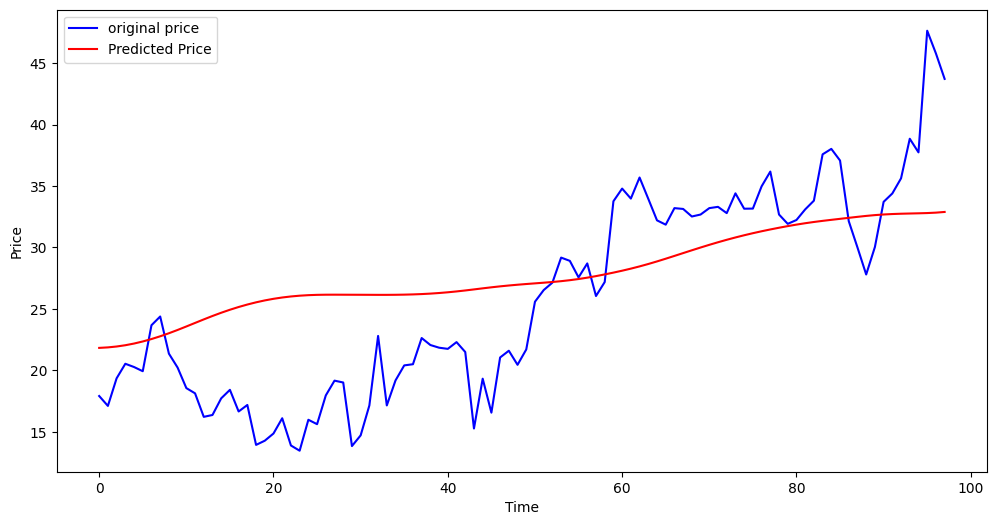

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'original price' )
plt.plot(y_predicted, 'r',label = 'Predicted Price' )
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
